# ch 6. 트레이딩 전략과 구현
목적은 가격 변화를 예측해 수익을 창출하는 것이다. \
현대 포트폴리오 이론과 효율적 투자선 \
볼린저 밴드를 이용한 추세추종, 반전 매매기법 \
세가지 창으로 시장을 분석하는 삼중창 매매기법 \
상대 모멘텀과 절대 모멘텀을 합친 듀얼 모멘텀 전략
## 6.1 현대포트폴리오 이론
해리 맥스 마코위치: harry Max Markowitz, portfolio selection, 평균-분산 최적화 mean-variance optimization MVO 예상수익율과 리스크 상관관계 활용해 포트폴리오 최적화하는 기법. modern portfolio theory. MPT
### 6.1.1 수익률과 표준편차
수익율의 표준편차 standard deviation of returns는 자산가격이 평균값에서 벗어나는 정도, risk를 측정하는 방법, 주가의 변동성을 의미.
### 6.1.2 효율적 투자선
efficient frontier, 효율적 투자선\
x: risk(stdev), y: 예상수익률(mean)\
효율적 투자선 위에 위치한 포트폴리오에 따라 자산을 배분
#### 시총 상위 4 종목으로 효율적 투자선 구하기
2018년: 삼성전자, SK하이닉스, 현대자동차, NAVER \
2025년 11월 기준 한국 시가총액 상위 10개 기업은 삼성전자, SK하이닉스를 비롯해 두산에너빌리티, 한화에어로스페이스, HD현대중공업, KB금융, 신한지주, NAVER, 셀트리온, 한국전력 등이 포함될 수 있으며, 순위는 수시로 변동될 수 있습니다. 

stocks = ['삼성전자', 'SK하이닉스', '두산에너빌리티', '한화에어로스페이스']


df.pct_change()의 기본적인 계산 공식은 다음과 같습니다.

$$\text{변화율} = \frac{\text{현재 값} - \text{직전 값}}{\text{직전 값}} $$이것을 주식 시장의 **일별 수익률**에 대입하면 다음과 같습니다. $$\text{일별 수익률} = \frac{\text{오늘 종가} - \text{어제 종가}}{\text{어제 종가}} $$\#\#\# 1. 코드와 결과 예시 | 날짜 | 종가 (`close`) | 계산 (`pct_change`) | | :--- | :---: | :---: | | D-1 | 100 | NaN | | D0 | 110 | $(110 - 100) / 100 = 0.10$ (10%) | | D1 | 99 | $(99 - 110) / 110 = -0.10$ (-10%) | 첫 번째 행은 비교할 이전 값이 없으므로 일반적으로 `NaN` (Not a Number) 값이 됩니다. ----- ## 📝 주요 매개변수 (`periods`) `pct_change()` 메서드는 기간을 조절할 수 있는 유용한 매개변수를 가지고 있습니다. | 매개변수 | 설명 | 공식 | | :--- | :--- | :--- | | `periods=1` (기본값) | 직전 기간(하루 전) 대비 변화율 | $\frac{V_t - V_{t-1}}{V_{t-1}}$ | | `periods=5` | 5기간(5일) 전 대비 변화율 | $\frac{V_t - V_{t-5}}{V_{t-5}}$ | | `periods=-1` | 다음 기간 대비 변화율 (선행 변화율) | $\frac{V_{t+1} - V_t}{V_t}$ | 이 매개변수를 활용하면 일별 수익률뿐만 아니라 **주간 수익률**, **월간 수익률** 등 다양한 기간의 수익률을 쉽게 계산할 수 있습니다. ### 사용 예시: 주간 수익률 계산 ```python # daily_price DataFrame이 있다고 가정 # df['close'] : 종가 데이터 # 5일 전 종가 대비 현재 종가 변화율 (주간 수익률) 계산 weekly_returns = df['close'].pct_change(periods=5) ```$$

[0.29031432 0.06692237 0.21359125 0.42917206]
        Returns      Risk      삼성전자    SK하이닉스   두산에너빌리티  한화에어로스페이스
0      1.286025  0.391752  0.131331  0.406813  0.261917   0.199938
1      1.113885  0.356291  0.331719  0.109846  0.260337   0.298098
2      1.171028  0.422539  0.185805  0.069294  0.266190   0.478711
3      1.219790  0.380814  0.162479  0.425310  0.119257   0.292953
4      1.184093  0.365814  0.223489  0.299939  0.184227   0.292344
...         ...       ...       ...       ...       ...        ...
19995  1.228864  0.399000  0.298871  0.177891  0.463719   0.059520
19996  1.174620  0.362687  0.330961  0.224680  0.332758   0.111601
19997  1.118020  0.351282  0.297579  0.302468  0.101157   0.298797
19998  1.146438  0.360297  0.288621  0.438738  0.069199   0.203442
19999  1.102108  0.385497  0.290314  0.066922  0.213591   0.429172

[20000 rows x 6 columns]


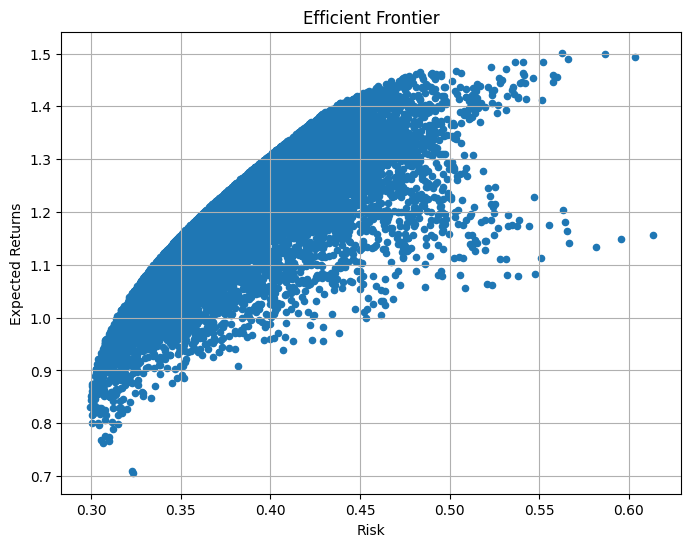

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

# 1. 경로 추가 (Investar 폴더의 상위 폴더인 C:\myPackage를 추가)
# 이 작업이 성공해야 from Investar... 임포트가 가능합니다.
investar_parent_path = 'C:\\myPackage' 
if investar_parent_path not in sys.path:
    sys.path.append(investar_parent_path)
    
# 2. MarketDB 클래스 임포트 및 객체 생성
from Investar.Analyzer import MarketDB
mk = MarketDB() 

stocks = ['삼성전자', 'SK하이닉스', '두산에너빌리티', '한화에어로스페이스']
#stocks = ['삼성전자', 'SK하이닉스','한화에어로스페이스']
df = pd.DataFrame()
for s in stocks:
    df[s] = mk.get_daily_price(s, '2024-11-20', '2025-11-20')['close']

#print(df)

daily_ret = df.pct_change()  #pct: percentage change, returns = (today close - yesterday close) / yesterday close
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov() 
annual_cov = daily_cov * 252

port_ret = [] 
port_risk = [] 
port_weights = [] 

#print(daily_ret)
#print(annual_ret)
#print(daily_cov)

# 모테카를로
for _ in range(20000):
    weights = np.random.random(len(stocks)) #랜덤 4개숫자
    weights /= np.sum(weights)  # 위에서 구한 숫자를 총합으로 나눠 4종목 비중의 합니다. 1이 되도록 

    returns = np.dot(weights, annual_ret) # 비중 배열과 연간 수익률을 곱해 해당 포트폴리오 전체 수익률을 구한다.
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) #해당 포트폴리오 전체 리스크
    # sqrt((종목별 비중 전치)((종목별 연간 공분산)(종목별비중)))

    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(weights) 

portfolio = {'Returns': port_ret, 'Risk': port_risk} 
for i, s in enumerate(stocks): 
    portfolio[s] = [weight[i] for weight in port_weights] 
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk'] + [s for s in stocks]] 

print(weights)
#print(portfolio) jupyter server will stop sending output
print(df)
#점 하나가 각각의 포트폴리오를 나타낸다.
df.plot.scatter(x='Risk', y='Returns', figsize=(8, 6), grid=True)
plt.title('Efficient Frontier') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show() 



## 6.2 샤프지수와 포트폴리오 최적화
현대 포트폴리오 이론에 따르면 개별 리스크가 주어졌을 때 효율적 투자선보다 높은 수익률은 기대할 수 없다.\
그렇다면 리스크를 최소화하고 수익률은 최대화하는 포트폴리오는 어떻게 찾아낼 수 있을까?\
해리 마코위츠의 초기 이론만으로는 이를 해결하기에는 부족하다.\
마코위츠의 제자인 윌리엄샤프 William Sharpe의 후속연구를 살펴보자.
### 6.2.1 샤프 지수
샤프지수는 측정된 단위 risk당 수익률을 계산한다는 점에서 수익률의 표준편차와 다른 점이 있다.
$$샤프지수=\frac{포트폴리오 수익률 - 무위험률}{수익률의 표준편차} $$
편의를 고려해 무위험률을 0으로 가정했고, 샤프 지수는 포트폴리오의 예상 수익률을 수익률의 표준편차로 나우어서 구했다. 예를 들어 예상 수익률이 7%이고 표준편차가 5%인 경우, 샤프지수는 7/5=1.4가 된다. 샤프지수가 높을수록 위험에 대한 보상이 더 크다.
$$portfolio\ risk = \sqrt{(종목별\ 비중)_T ((종목별\ 연간\ 공분산)(종목별\ 비중)} $$
변수가 한개일 때는 risk는 일반적인 표준편차이지만, 변수가 4개일 때는 위와 같이 공분산으로 구한다. 종목별 연간 공분산과 종목별 비중 배열을 곱한 뒤 이를 다시 종목별 비중의 전치로 곱한다.
# 그래프 해석
최대 샤프 비율(Max Sharpe Ratio)을 가진 포트폴리오를 찾으셨습니다! 이 포트폴리오는 위험(Risk) 한 단위당 가장 높은 초과 수익을 기대할 수 있는 이론적인 최적의 투자 조합입니다.\

       Returns      Risk    Sharpe      삼성전자    SK하이닉스   두산에너빌리티  한화에어로스페이스 \
2734  1.189831  0.359888  3.306114  0.264276  0.325346  0.227142   0.183237 

Returns 1.18 119%, 예상 연간 수익율\
Risk 0.359 36%, 예상 연간 위험도(표준편차)\
sharpe 3.306 위험 조정 수익률(수익률/표준편차, 최빈값)

실제로 이 포트폴리오에 투자하려면, 각 종목에 제시된 **비중(Weights)** 만큼 자금을 배분해야 합니다. 이 비중은 총 투자금액의 **100%** 를 나타냅니다.\
삼성전자	0.264276 (약 26.43%)	2,643만 원\
SK하이닉스	0.325346 (약 32.53%)	3,253만 원\
두산에너빌리티	0.227142 (약 22.71%)	2,271만 원\
한화에어로스페이스	0.183237 (약 18.32%)	1,832만 원\
합계	1.000001 (100%)	100,000만 원\
실제 매수 단위: 주식은 1주 단위로만 거래가 가능합니다. 따라서 금액을 비중에 정확히 맞추는 것은 불가능하며, 비중에 가장 가까운 주식 수로 매수해야 합니다.\
포트폴리오 리밸런싱: 시간이 지나면서 주가가 변동하면 각 종목의 비중이 초기 비중에서 벗어납니다. 이 효율적인 포트폴리오의 성능을 유지하려면, 주기적으로 (예: 분기별 또는 반기별) **리밸런싱(Rebalancing)**을 통해 비중을 초기 목표치로 되돌려야 합니다.\
가정의 한계: 이 결과는 과거 데이터에 기반한 이론적인 최적값이며, 미래 수익률을 보장하지 않습니다. 실제 투자 시에는 시장 상황과 기업의 최신 정보를 함께 고려해야 합니다.

       Returns      Risk    Sharpe      삼성전자   SK하이닉스   두산에너빌리티  한화에어로스페이스
6281  1.185309  0.358514  3.306174  0.271146  0.32148  0.226229   0.181145
       Returns     Risk    Sharpe      삼성전자   SK하이닉스   두산에너빌리티  한화에어로스페이스
1164  0.837846  0.29985  2.794218  0.730158  0.05444  0.058233   0.157169


<Figure size 1000x600 with 0 Axes>

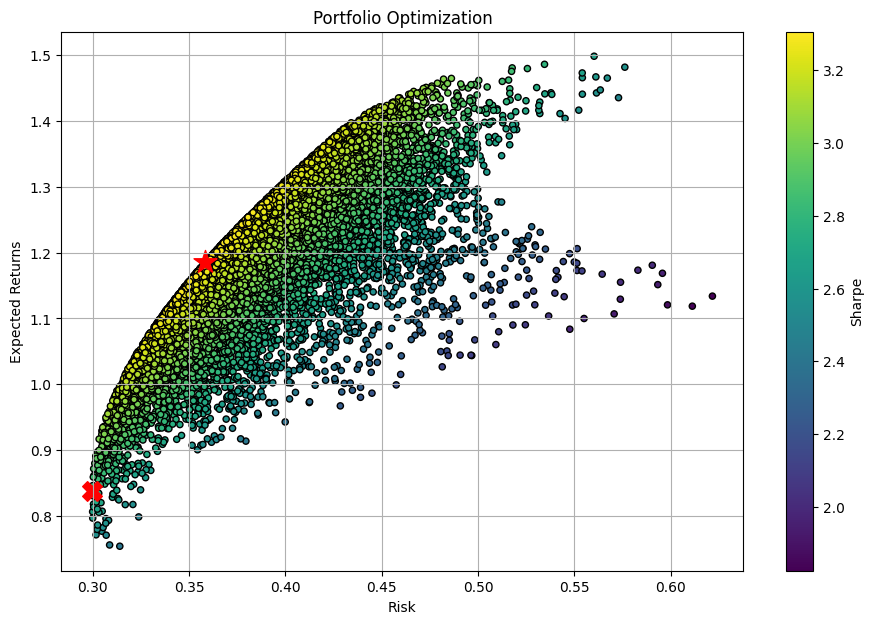

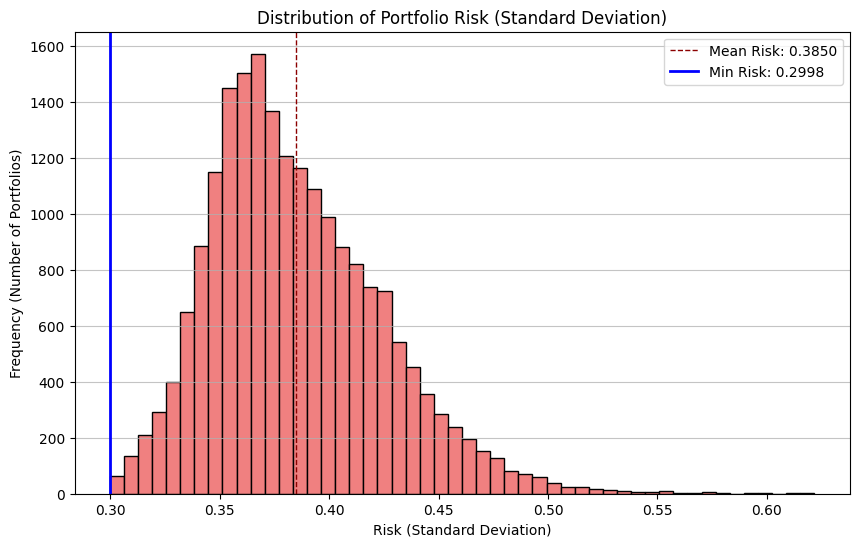

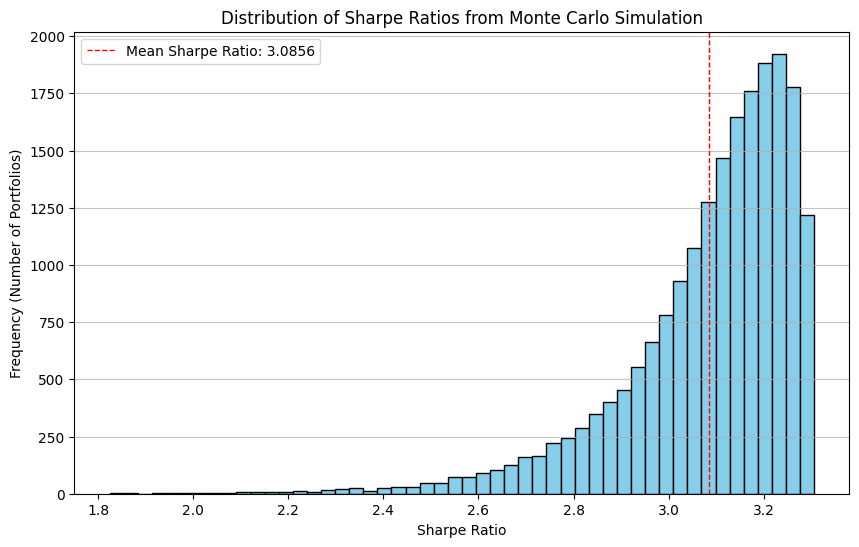

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

# 1. 경로 추가 (Investar 폴더의 상위 폴더인 C:\myPackage를 추가)
# 이 작업이 성공해야 from Investar... 임포트가 가능합니다.
investar_parent_path = 'C:\\myPackage' 
if investar_parent_path not in sys.path:
    sys.path.append(investar_parent_path)
    
# 2. MarketDB 클래스 임포트 및 객체 생성
from Investar.Analyzer import MarketDB
mk = MarketDB() 

stocks = ['삼성전자', 'SK하이닉스', '두산에너빌리티','한화에어로스페이스']
#stocks = ['삼성전자', 'SK하이닉스','한화에어로스페이스']
df = pd.DataFrame()
for s in stocks:
    df[s] = mk.get_daily_price(s, '2024-11-20', '2025-11-20')['close']

#print(df)

daily_ret = df.pct_change()  #pct: percentage change, returns = (today close - yesterday close) / yesterday close
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov() 
annual_cov = daily_cov * 252

port_ret = [] 
port_risk = [] 
port_weights = [] 
sharpe_ratio = []

#print(daily_ret)
#print(annual_ret)
#print(daily_cov)
#print(annual_cov)

# 모테카를로
for _ in range(20000):
    weights = np.random.random(len(stocks)) #랜덤 4개숫자
    weights /= np.sum(weights)  # 위에서 구한 숫자를 총합으로 나눠 4종목 비중의 합니다. 1이 되도록 

    returns = np.dot(weights, annual_ret) # 비중 배열과 연간 수익률을 곱해 해당 포트폴리오 전체 수익률을 구한다.
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) #해당 포트폴리오 전체 리스크, 
    #sqrt((종목별 비중 전치)((종목별 연간 공분산)(종목별비중)))

    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk)

portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe': sharpe_ratio}
for i, s in enumerate(stocks): 
    portfolio[s] = [weight[i] for weight in port_weights] 
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk', 'Sharpe'] + [s for s in stocks]]

max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]
min_risk = df.loc[df['Risk'] == df['Risk'].min()]

print(max_sharpe)
print(min_risk)

### portfolio with sharpe ###
plt.figure(figsize=(10, 6))
df.plot.scatter(x='Risk', y='Returns', c='Sharpe', cmap='viridis', edgecolors='k', figsize=(11,7), grid=True)
plt.scatter(x=max_sharpe['Risk'], y=max_sharpe['Returns'], c='r', marker='*', s=300)
plt.scatter(x=min_risk['Risk'], y=min_risk['Returns'], c='r', marker='X', s=200)
plt.title('Portfolio Optimization') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show()

### risk histogram ###
plt.figure(figsize=(10, 6))
plt.hist(df['Risk'], bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribution of Portfolio Risk (Standard Deviation)')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Frequency (Number of Portfolios)')
plt.grid(axis='y', alpha=0.75)

plt.axvline(df['Risk'].mean(), color='darkred', linestyle='dashed', linewidth=1, label=f'Mean Risk: {df["Risk"].mean():.4f}')

min_risk_value = df['Risk'].min()
plt.axvline(min_risk_value, color='blue', linestyle='solid', linewidth=2, label=f'Min Risk: {min_risk_value:.4f}')
plt.legend()
plt.show()

### sharpe_ratio ###
plt.figure(figsize=(10, 6))
plt.hist(df['Sharpe'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Sharpe Ratios from Monte Carlo Simulation')
plt.xlabel('Sharpe Ratio')
plt.ylabel('Frequency (Number of Portfolios)')
plt.grid(axis='y', alpha=0.75)
plt.axvline(df['Sharpe'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean Sharpe Ratio: {df["Sharpe"].mean():.4f}')
plt.legend()
plt.show()
